<a href="https://colab.research.google.com/github/minusV25/MyProjects/blob/master/Loan_Prediction_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAN PREDICTION PROBLEM**

---



**AIM:** The aim is to build a model that will classify how much loan a user can take from the firm/bank.


**NOTE:** The data sets used for this project have been taken from kaggle

In [63]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
data_to_load = files.upload()


Saving Test set.csv to Test set.csv
Saving Train set.csv to Train set.csv


# Reading Data into the Notebook

In [3]:
#read data into the notebook
train_set= pd.read_csv('Train set.csv')
test_set= pd.read_csv('Test set.csv')

In [4]:
train_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Preprocessing the data

**NOTE:** This has only been done for visualisation purposes. The library used for prediction even accomodates the missing values and accepts categorical variables, thus, there is no loss of information.

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#some of the rows are empty
#so the best possible way in this case is to delete the null rows
#here, we have to predict the loan amount
#therefore we will eliminate the rows with empty loan amount
train_set.dropna(axis= 0, how= 'any', inplace= True)
test_set.dropna(axis=0, how='any', inplace= True)

# Visualizing the Data

Here, we will analyse that which variables have more weight on the to be predicted value, i.e the loan amount. The ones which have a large effect on the loan amount will be used for prediction.



**1.   Relationship between Loan Amount and Gender**




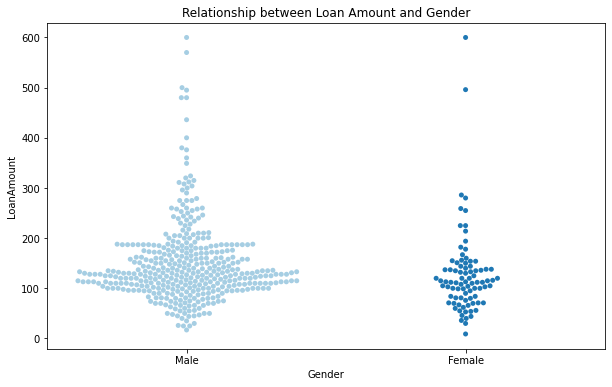

In [7]:
plt.figure(figsize=(10,6))
plt.title('Relationship between Loan Amount and Gender')
#plt.xlabel('GENDER')
#plt.ylabel('LOAN AMOUNT')
sns.swarmplot(x= train_set['Gender'], y= train_set['LoanAmount'], palette= 'Paired')
plt.show()


OBSEVATION AND CONCLUSION:


*   In the swarm plot above, there is a gender disparity as more loans are taken by males than females.
*  Eventhough there is a gender gap, gender is not a criteria for the loan amount.
*   Therefore, gender will not be chosen a a criteria for predicting the loan amount.












**2. Relationship between Loan Amount, Martital status and the Number of Dependents**

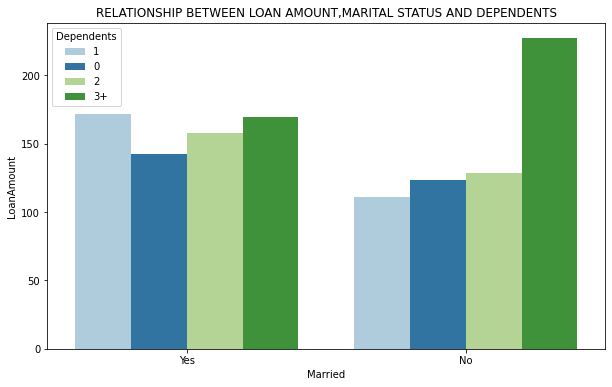

In [8]:
plt.figure(figsize=(10,6))
plt.title('RELATIONSHIP BETWEEN LOAN AMOUNT,MARITAL STATUS AND DEPENDENTS')
plt.xlabel('MARITAL STATUS')
plt.ylabel('LOAN AMOUNT')
sns.barplot(x= train_set['Married'], y= train_set['LoanAmount'], hue= train_set['Dependents'],palette= 'Paired', ci= None)
plt.show()

OBSERVATION AND CONCLUSION:

*   As observed, married loan takers opt for a higher loan amount than the unmarried ones.
*   When the number of dependents is more than 3, then the unmarried loan takers overtake the married ones.
*   Therefore, marital status and the number of dependents turn out to be a crucial factor for the prediction of loan amount.






**3. Relationship between Loan Amount, Education and Self Emploment**

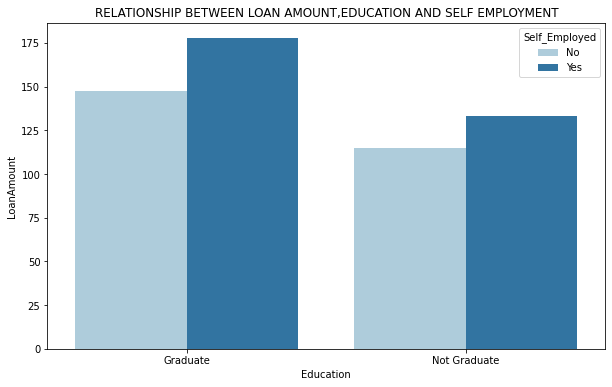

In [9]:
plt.figure(figsize=(10,6))
plt.title('RELATIONSHIP BETWEEN LOAN AMOUNT,EDUCATION AND SELF EMPLOYMENT')
plt.xlabel=('MARITAL STATUS')
plt.ylabel=('LOAN AMOUNT')
sns.barplot(x= train_set['Education'], y= train_set['LoanAmount'], hue= train_set['Self_Employed'],palette= 'Paired', ci= None)
plt.show()


OBSERVATION AND CONCLUSION:


*   According to the graph, loan takers with a graduate degree take a higher loan amount irrespective of their type of employment.
*   Self Employed loan takers opt for a higher loan amount.
*   Therefore, both the factors have a significant effect on the loan amount and will be used for prediction.






**4. Relationship between Loan Amount and Applicant Income**

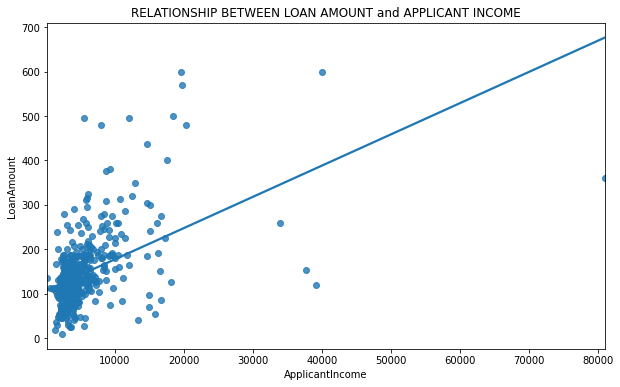

In [10]:
plt.figure(figsize=(10,6))
plt.title('RELATIONSHIP BETWEEN LOAN AMOUNT and APPLICANT INCOME')
sns.regplot(x= train_set['ApplicantIncome'], y= train_set['LoanAmount'], ci= None)
plt.show()

OBSERVATION AND CONCLUSION:

*   According the graph, there is a linear relationship between the loan amount and the applicant income.
*   Most of the loan takers belong to the 0 to 20,000 category.
*   Applicant Income clearly plays a critical role in the prediction of Loan Amount, therefore will be used for the predictive analysis.






**5. Relationship between Loan Amount and Property Area**

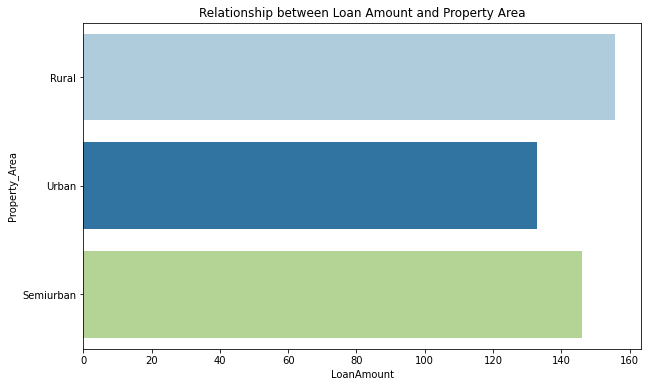

In [11]:
plt.figure(figsize=(10,6))
plt.title('Relationship between Loan Amount and Property Area')
sns.barplot(y= train_set['Property_Area'], x= train_set['LoanAmount'], palette= 'Paired', ci= None)
plt.show()

OBSERVATION AND CONCLUSION:



*   The bar chart indicates that the loan amount increases in the order; Rural, Semi-Urban and Urban respecively.
*   Eventhough there isn't much difference between the three area categories, it still seems to be an indicator of loan amount and thus will be used for prediction.



# Predicting the Loan Amount

In [19]:
! pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

     |████████████████████████████████| 128.4MB 84kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=fc0907a4c4a30abd1cb34e299b26e033acad89505fa441465fda5aeab263f7c1
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmploxftanm
  JVM stdout: /tmp/tmploxftanm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmploxftanm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Conne

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_dt6tt6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [43]:
#loading the table again in the H2o format
data_train = h2o.import_file('Train set.csv')
data_test= h2o.import_file('Test set.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
#define the model
model_loan = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)
#training the model
model_loan.train(['Married', 'Dependents','Education','Self_Employed','ApplicantIncome','Property_Area'],'LoanAmount', data_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [59]:
#model performance
performance_loan= model_loan.model_performance(test_data= data_test )

In [62]:
#print the performance of the model and display the errors
print(performance_loan)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3058.1104139419213
RMSE: 55.30018457421206
MAE: 39.554398947025504
RMSLE: 0.40592367493779813
Mean Residual Deviance: 3058.1104139419213



***Project by: <br>
Manasvi Logani***